## Simulación Monte Carlo

Queremos en el proyecto, buscar la forma de unir activos con una probabilidad de que saquemos 

In [12]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

In [13]:
import yfinance as yf
from datetime import datetime
import pandas as pd

goog = yf.Ticker('goog')
data = goog.history(period="max")
data

#Nos tremos las acciones en un año.

#We have a dataset called data

# #Elijamos las fechas que queremos analizar
# start=datetime(2019,1,1)
# end=datetime(2020,1,1)


# data_fechas=pd.DataFrame(data(start = start, end = end))

data.index = pd.to_datetime(data.index)





In [14]:
len(data)

4847

In [15]:


start_date = '2022-01-01'
end_date = '2022-12-31'

selected_data = data[(data.index >= start_date) & (data.index <= end_date)]

In [16]:
data_filtered=selected_data
data_filtered

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-03 00:00:00-05:00,144.475494,145.550003,143.502502,145.074493,25214000,0.0,0.0
2022-01-04 00:00:00-05:00,145.550507,146.610001,143.816147,144.416504,22928000,0.0,0.0
2022-01-05 00:00:00-05:00,144.181000,144.298004,137.523499,137.653503,49642000,0.0,0.0
2022-01-06 00:00:00-05:00,137.497498,139.686005,136.763504,137.550995,29050000,0.0,0.0
2022-01-07 00:00:00-05:00,137.904999,138.254745,135.789001,137.004501,19408000,0.0,0.0
...,...,...,...,...,...,...,...
2022-12-23 00:00:00-05:00,87.620003,90.099998,87.620003,89.809998,17815000,0.0,0.0
2022-12-27 00:00:00-05:00,89.309998,89.500000,87.535004,87.930000,15470900,0.0,0.0
2022-12-28 00:00:00-05:00,87.500000,88.519997,86.370003,86.459999,17879600,0.0,0.0


In [17]:
##Vamos a dividir nuestros datos en test y en prueba para esto vamos a tomar 200 columnas y tesd de las 51
last_date=data_filtered.index[0]
last_date

next_100_days=pd.date_range(start=last_date,periods=100,freq='D')
next_100_days

missing_dates = next_100_days[~next_100_days.isin(data_filtered.index)]

# Select only the existing dates in the filtered dataset
filtered_last_100 = data_filtered.loc[next_100_days.intersection(data_filtered.index)]


In [18]:
filtered_last_100

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2022-01-03 00:00:00-05:00,144.475494,145.550003,143.502502,145.074493,25214000,0.0,0.0
2022-01-04 00:00:00-05:00,145.550507,146.610001,143.816147,144.416504,22928000,0.0,0.0
2022-01-05 00:00:00-05:00,144.181000,144.298004,137.523499,137.653503,49642000,0.0,0.0
2022-01-06 00:00:00-05:00,137.497498,139.686005,136.763504,137.550995,29050000,0.0,0.0
2022-01-07 00:00:00-05:00,137.904999,138.254745,135.789001,137.004501,19408000,0.0,0.0
...,...,...,...,...,...,...,...
2022-04-06 00:00:00-04:00,139.161499,139.848495,136.418106,137.175995,23574000,0.0,0.0
2022-04-07 00:00:00-04:00,136.617996,137.701508,134.857254,136.464996,19448000,0.0,0.0
2022-04-08 00:00:00-04:00,136.250000,136.250000,133.752502,134.010498,16434000,0.0,0.0
2022-04-11 00:00:00-04:00,132.899994,132.939194,129.617493,129.796494,24188000,0.0,0.0


<function matplotlib.pyplot.show(close=None, block=None)>

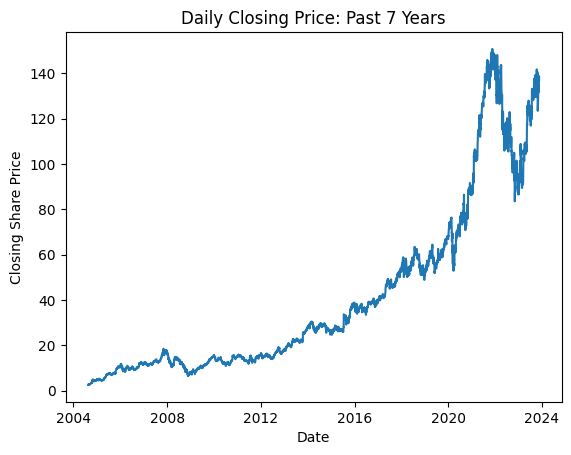

In [19]:
plt.plot(data.index, data.Close)
plt.title('Daily Closing Price: Past 7 Years')
plt.xlabel('Date')
plt.ylabel('Closing Share Price')
plt.show

c:\Users\David\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\David\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\David\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


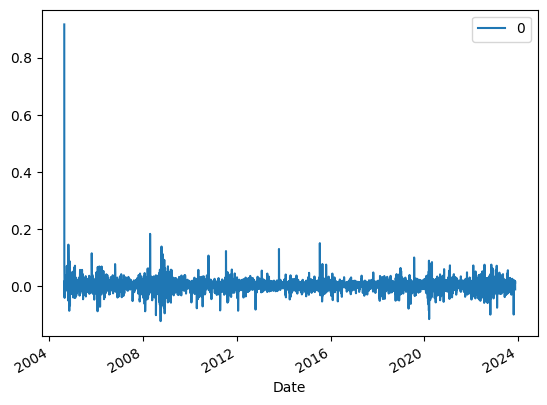

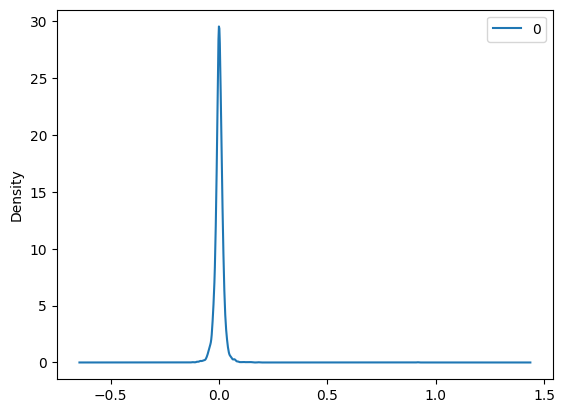

                 0
count  4847.000000
mean      0.001034
std       0.023336
min      -0.123688
25%      -0.007851
50%       0.000746
75%       0.010103
max       0.915944


In [20]:
# fits the ARIMA model
import statsmodels.tsa.arima.model as ARIMA
import statsmodels.api as sm

endog_variable = 'Close'  # Replace with the actual column name you want to predict

# Create the SARIMAX model
order = (1, 1, 1)  # Replace with the appropriate order (p, d, q) for your model
model = sm.tsa.ARIMA(np.log(data[endog_variable]), order=order)
model_arima_fit=model.fit()
# Fit the model

residuals = pd.DataFrame(model_arima_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

SKIPPED _fit distribution (taking more than 30 seconds)
SKIPPED loguniform distribution (taking more than 30 seconds)
SKIPPED gausshyper distribution (taking more than 30 seconds)
SKIPPED johnsonsb distribution (taking more than 30 seconds)
SKIPPED kappa4 distribution (taking more than 30 seconds)
SKIPPED ksone distribution (taking more than 30 seconds)
SKIPPED levy_stable distribution (taking more than 30 seconds)
SKIPPED reciprocal distribution (taking more than 30 seconds)
SKIPPED lognorm distribution (taking more than 30 seconds)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
SKIPPED mielke distribution (taking more than 30 seconds)
SKIPPED ncf distribution (taking more than 30 seconds)
SKIPPED nct distribution (taking more than 30 seconds)
SKIPPED ncx2 distribution (taking more than 30 seconds)
c:\Users\David\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The ma

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
genhyperbolic,4.154920,1363.725770,1396.156347,inf,0.012614,0.420099
laplace_asymmetric,6.252466,5354.920012,5374.378357,inf,0.019600,0.047631
johnsonsu,6.555974,1747.925483,1773.869944,inf,0.010511,0.653837
laplace,6.721380,5481.280465,5494.252696,inf,0.016596,0.136927
loglaplace,6.849503,3319.209016,3338.667362,inf,0.019360,0.052167


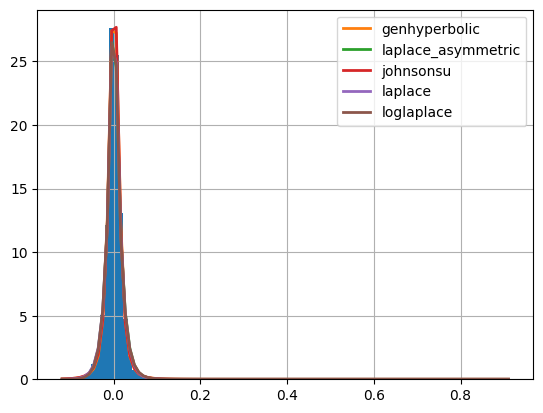

c:\Users\David\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\David\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


In [21]:
from fitter import Fitter
f = Fitter(residuals)
f.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
f.summary()

In [23]:
print(f.get_best(method='sumsquare_error'),"Parameters loc,a,b,scale")


{'genhyperbolic': {'p': -1.4391695743829294, 'a': 0.002028610465435448, 'b': 0.0020278965878270726, 'loc': 0.000981941634575714, 'scale': 0.020039666273934612}} Parameters loc,a,b,scale


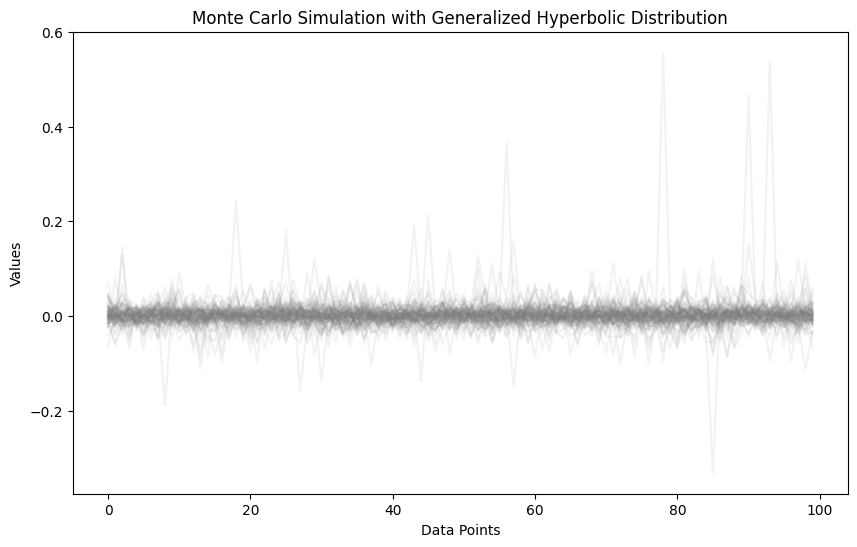

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import genhyperbolic

# Parameters for the Generalized Hyperbolic distribution
params = {'p': -1.4391695743829294,
          'a': 0.002028610465435448,
          'b': 0.0020278965878270726,
          'loc': 0.000981941634575714,
          'scale': 0.020039666273934612}

# Number of simulations
num_simulations = 100

# Number of data points in each simulation
num_points = 100

# Perform Monte Carlo simulation
simulations = np.zeros((num_simulations, num_points))

for i in range(num_simulations):
    # Generate data points using the Generalized Hyperbolic distribution parameters
    simulation_data = genhyperbolic.rvs(**params, size=num_points)
    simulations[i, :] = simulation_data

# Plot the Monte Carlo simulations
plt.figure(figsize=(10, 6))
plt.title('Monte Carlo Simulation with Generalized Hyperbolic Distribution')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.plot(simulations.T, color='gray', alpha=0.1)
plt.show()


In [ ]:
##Pre parcial

